In [2]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas openml

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml
import sklearn

# Práctica 4: EDA en Series de Tiempo

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado se llama _Digital Currency_ y puede leer su descripción en la siguiente liga

https://www.openml.org/d/43748

In [4]:
# Descarga la metadata del dataset
dataset_info = openml.datasets.get_dataset(43748, download_data=False)

# Obtiene el nombre de la columna a predecir
target = dataset_info.default_target_attribute

(
    features, # Dataframe con las características que se pueden utilizar para predecir
    outputs, # Columna a predecir
    categorical_mask, # Máscara que indica que columnas de todas las características son categoricas
    columns # Lista con el nombre de las características
)= dataset_info.get_data(
    dataset_format="dataframe", target=target
)

categorical_mask = np.array(categorical_mask)
columns = np.array(columns)

In [5]:
print(f"La columna a predecir se llama '{target}'")
print(f"Todas las características son {str(columns)}")
print(f"Las características categóricas son {str(columns[categorical_mask])}")
print(f"Las características numéricas son {str(columns[~categorical_mask])}")

La columna a predecir se llama 'None'
Todas las características son ['City' 'Center' 'Date' 'Year' 'Month' 'Season' 'PM1_0' 'PM2_5' 'PM10'
 'Temperature_F' 'Humidity_%' 'AQI' 'New_cases' 'Cumulative_cases'
 'New_deaths' 'Cumulative_deaths']
Las características categóricas son []
Las características numéricas son ['City' 'Center' 'Date' 'Year' 'Month' 'Season' 'PM1_0' 'PM2_5' 'PM10'
 'Temperature_F' 'Humidity_%' 'AQI' 'New_cases' 'Cumulative_cases'
 'New_deaths' 'Cumulative_deaths']


In [6]:
# Impresión de las características
features

,City,Center,Date,Year,Month,Season,PM1_0,PM2_5,PM10,Temperature_F,Humidity_%,AQI,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,Yangon,7 Miles Mayangone,10/20/2019 0:00,2019,October,Rainy Season,29.60,44.27,52.87,95.67,49.64,122.59,0,0,0,0
1,Yangon,7 Miles Mayangone,10/21/2019 0:00,2019,October,Rainy Season,25.22,37.49,45.21,94.42,51.67,105.90,0,0,0,0
2,Yangon,7 Miles Mayangone,10/22/2019 0:00,2019,October,Rainy Season,24.46,35.84,42.32,95.40,49.26,101.84,0,0,0,0
3,Yangon,7 Miles Mayangone,10/23/2019 0:00,2019,October,Rainy Season,23.42,34.53,41.37,96.39,48.06,98.17,0,0,0,0
4,Yangon,7 Miles Mayangone,10/24/2019 0:00,2019,October,Rainy Season,38.29,56.55,68.59,93.70,57.11,151.54,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,Mandalay,Jefferson Center,10/27/2020 0:00,2020,October,Rainy Season,19.50,31.46,37.68,93.33,55.19,91.71,1426,46200,27,1122
5118,Mandalay,Jefferson Center,10/28/2020 0:00,2020,October,Rainy Season,17.36,27.30,31.57,94.07,54.33,82.97,1466,47666,25,1147
5119,Mandalay,Jefferson Center,10/29/2020 0:00,2020,October,Rainy Season,15.30,24.34,27.73,93.45,57.17,76.74,1406,49072,25,1172
5120,Mandalay,Jefferson Center,10/30/2020 0:00,2020,October,Rainy Season,10.18,16.20,18.90,92.64,52.21,59.62,1331,50403,27,1199


## Asignación 1 &#x1F625;

Plantee 2 preguntas que le parezcan interesantes a resolver con este dataset.

- ¿Cómo ha cambiado la calidad del aire a lo largo del tiempo en cada ciudad? Podemos trazar la serie de tiempo de diferentes variables de contaminación del aire y compararlas para cada ciudad. ¿Existe alguna tendencia?

- ¿Hay alguna correlación entre la calidad del aire y las muertes relacionadas con la contaminación en cada ciudad? Podemos explorar la relación entre diferentes variables de contaminación del aire y las tasas de mortalidad en cada ciudad.



## Asignación 2 &#x1F921;

Apoyado de las técnicas vistas en clase, realice un análisis exploratorio de datos (EDA) que le permita responder de manera guiada las preguntas planteadas anteriormente. Debe apoyarse de visualizaciones y métricas para respaldar sus respuestas.

In [7]:
import pandas as pd


# Convertir la columna 'Date' al formato de fecha y hora
features['Date'] = pd.to_datetime(features['Date'])

In [8]:
# Verificar si hay valores faltantes
print(features.isnull().sum())

# Verificar si hay valores duplicados
print(features.duplicated().sum())

# Eliminar los valores duplicados
df = features.drop_duplicates()

print(features.isnull().sum().sum())


City                 0
Center               0
Date                 0
Year                 0
Month                0
Season               0
PM1_0                0
PM2_5                0
PM10                 0
Temperature_F        0
Humidity_%           0
AQI                  0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64
0
0


In [9]:
# Mostrar las estadísticas descriptivas
print(features.describe())

              Year        PM1_0        PM2_5         PM10  Temperature_F  \
count  5122.000000  5122.000000  5122.000000  5122.000000    5122.000000   
mean   2019.814721    19.183834    28.922981    33.400779      91.186335   
std       0.388562    16.616498    25.700560    29.093998       3.839044   
min    2019.000000     0.000000     0.000000     0.000000      70.480000   
25%    2020.000000     5.840000     8.355000     9.287500      89.160000   
50%    2020.000000    19.180000    28.920000    33.400000      91.190000   
75%    2020.000000    27.477500    41.217500    50.240000      92.870000   
max    2020.000000   105.790000   189.860000   211.290000     105.140000   

        Humidity_%          AQI    New_cases  Cumulative_cases   New_deaths  \
count  5122.000000  5122.000000  5122.000000       5122.000000  5122.000000   
mean     53.356515    78.108790   150.764740       3444.090394     3.568333   
std       9.864227    51.758894   384.221306       9865.147819     9.535559   

Se observa que existen datos anomalos en PM1_0 , PM2_5 y PM10 


In [10]:
#Eliminaremos los datos outliers de PM1_0 , PM2_5 y PM10  y sustituiremos los valores faltantes por la media de cada columna
df['PM1_0'] = df['PM1_0'].clip(upper=df['PM1_0'].quantile(0.99))
df['PM2_5'] = df['PM2_5'].clip(upper=df['PM2_5'].quantile(0.99))
df['PM10'] = df['PM10'].clip(upper=df['PM10'].quantile(0.99))
df['PM1_0'].fillna(df['PM1_0'].mean(), inplace=True)
df['PM2_5'].fillna(df['PM2_5'].mean(), inplace=True)
df['PM10'].fillna(df['PM10'].mean(), inplace=True)


Ahora observaremos los nuevos datos

In [11]:
# Mostrar las estadísticas descriptivas
print(df.describe())

              Year        PM1_0        PM2_5         PM10  Temperature_F  \
count  5122.000000  5122.000000  5122.000000  5122.000000    5122.000000   
mean   2019.814721    19.085424    28.723286    33.191373      91.186335   
std       0.388562    16.255571    24.898086    28.312421       3.839044   
min    2019.000000     0.000000     0.000000     0.000000      70.480000   
25%    2020.000000     5.840000     8.355000     9.287500      89.160000   
50%    2020.000000    19.180000    28.920000    33.400000      91.190000   
75%    2020.000000    27.477500    41.217500    50.240000      92.870000   
max    2020.000000    70.967900   110.641600   117.395400     105.140000   

        Humidity_%          AQI    New_cases  Cumulative_cases   New_deaths  \
count  5122.000000  5122.000000  5122.000000       5122.000000  5122.000000   
mean     53.356515    78.108790   150.764740       3444.090394     3.568333   
std       9.864227    51.758894   384.221306       9865.147819     9.535559   

### ¿Cómo ha cambiado la calidad del aire a lo largo del tiempo en cada ciudad?

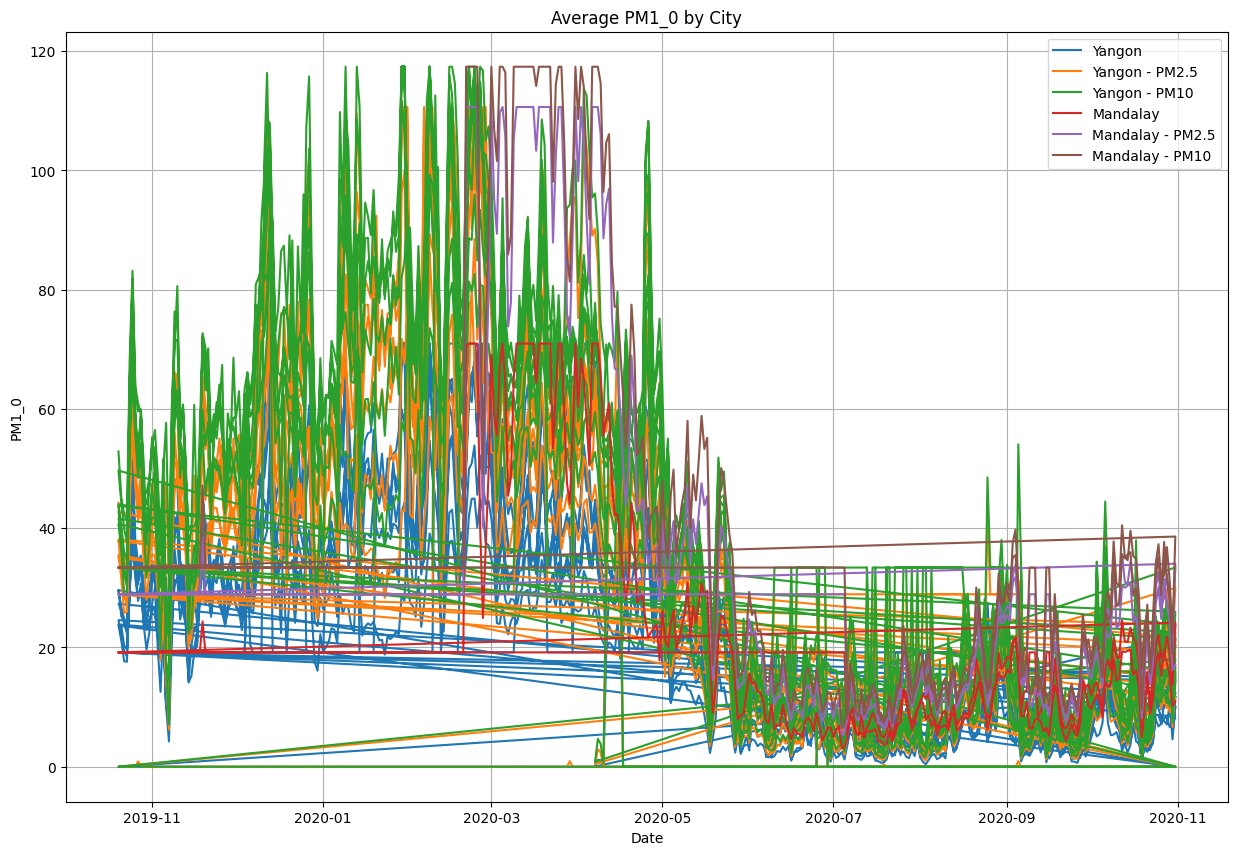

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Crear una lista de ciudades únicas en el conjunto de datos
cities = df['City'].unique()

# Crear un gráfico de líneas con múltiples líneas para cada ciudad y variable
fig, ax = plt.subplots(figsize=(15, 10))

# Agregar un fondo de cuadrícula
ax.grid(True)

for city in cities:
    df_city = df[df['City'] == city]
    ax.plot(df_city['Date'], df_city['PM1_0'], label=city)
    ax.plot(df_city['Date'], df_city['PM2_5'], label=f'{city} - PM2.5')
    ax.plot(df_city['Date'], df_city['PM10'], label=f'{city} - PM10')
ax.set_xlabel('Date')
ax.set_ylabel('PM1_0')
ax.set_title('Average PM1_0 by City')
ax.legend()
plt.show()


Aplicaremos un suavizado con medias moviles 

<small>El suavizado de una serie de tiempo puede tener diferentes efectos en los análisis posteriores que se realicen con ella.</small>

In [13]:
# Convertir la columna Date a formato de fecha
df['Date'] = pd.to_datetime(df['Date'])

factor_suavizado = 0.3
df[['PM1_0', 'PM2_5', 'PM10']] = df[['PM1_0', 'PM2_5', 'PM10']].ewm(alpha=factor_suavizado).mean()

In [14]:
#Eliminar las filas con valores faltantes
df.dropna(inplace=True)

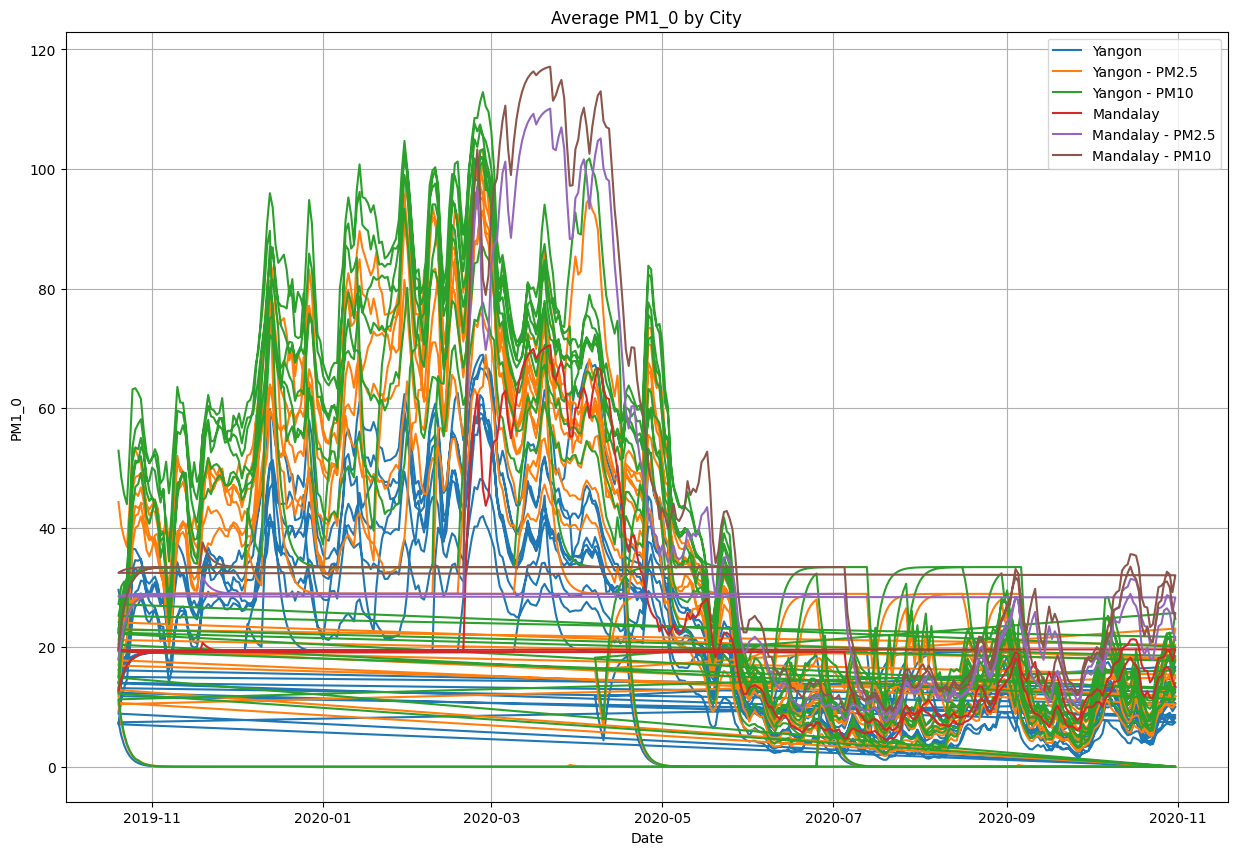

In [15]:
#graficar los datos de PM1_0, PM2_5 y PM10 por ciudad y por fecha 
fig, ax = plt.subplots(figsize=(15, 10))
ax.grid(True)
for city in cities:
    df_city = df[df['City'] == city]
    ax.plot(df_city['Date'], df_city['PM1_0'], label=city)
    ax.plot(df_city['Date'], df_city['PM2_5'], label=f'{city} - PM2.5')
    ax.plot(df_city['Date'], df_city['PM10'], label=f'{city} - PM10')
ax.set_xlabel('Date')
ax.set_ylabel('PM1_0')
ax.set_title('Average PM1_0 by City')
ax.legend()
plt.show()


En la primer  grafica podemos observar el cambio de los niveles de contaminacion a lo largo del tiempo, sin embargo podemos observar que presentan ciclos por temporadas y una notable tendencia decreciente. Observemos una grafica con y sin tendencia en los 3 diferentes parametros.

In [16]:
t = np.arange(len(df))
frequency = 1/365
x = np.column_stack((t, np.sin(2*np.pi*frequency*t), np.cos(2*np.pi*frequency*t)))
y = df["PM1_0"].values
w, resids, rank, s = np.linalg.lstsq(x, y, rcond=None)
pred = x.dot(w)
# print(pred)
resids = y-pred

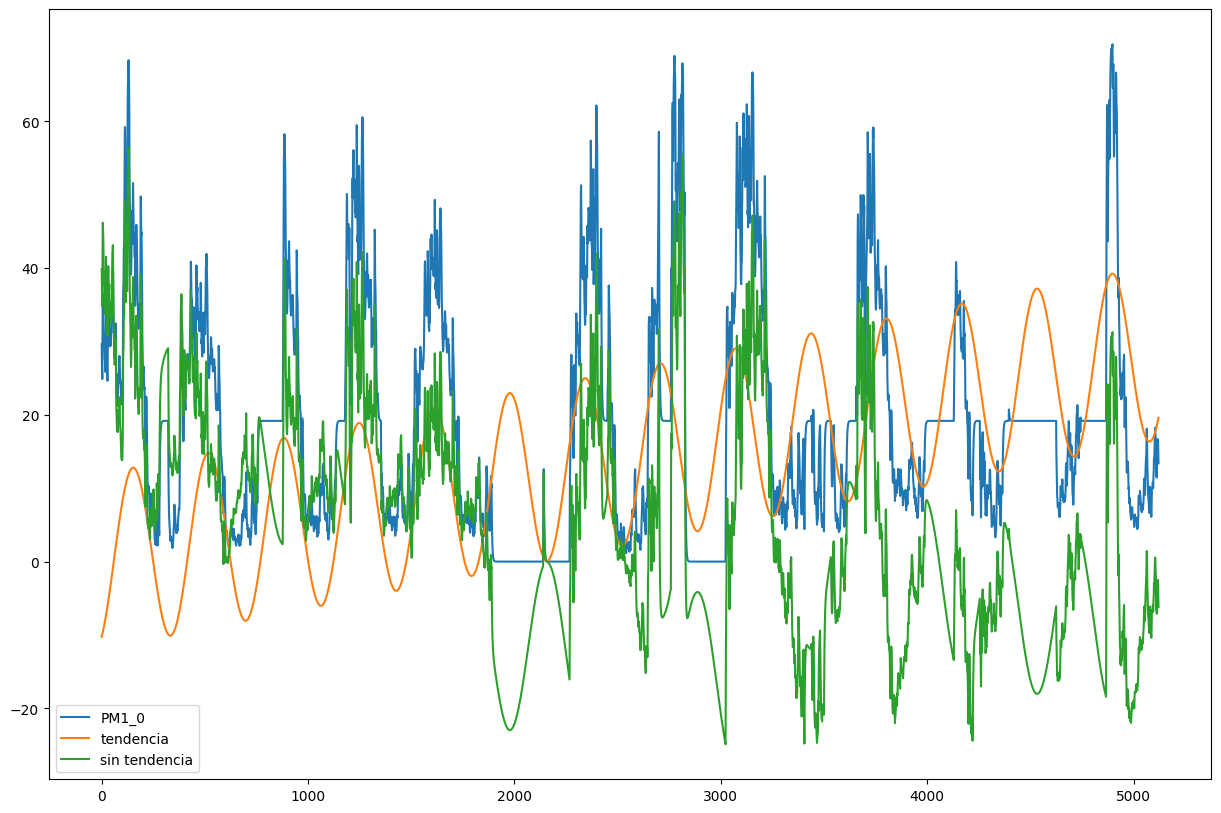

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(y, label='PM1_0')
plt.plot(pred, label='tendencia')
plt.plot(resids, label='sin tendencia')
plt.legend()


Eliminaremos  las tendencias de la serie de tiempo __PM1_0__ utilizando diferencias de primero orden. La primera diferencia es para eliminar la tendencia creciente y otra para eliminar los ciclos por temporadas.

In [18]:
dif1 = df['PM1_0'].diff()
# print(dif1)

dif2 = dif1.diff(periods=365)
# print(dif2)

Text(0.5, 1.0, 'Time Series differences')

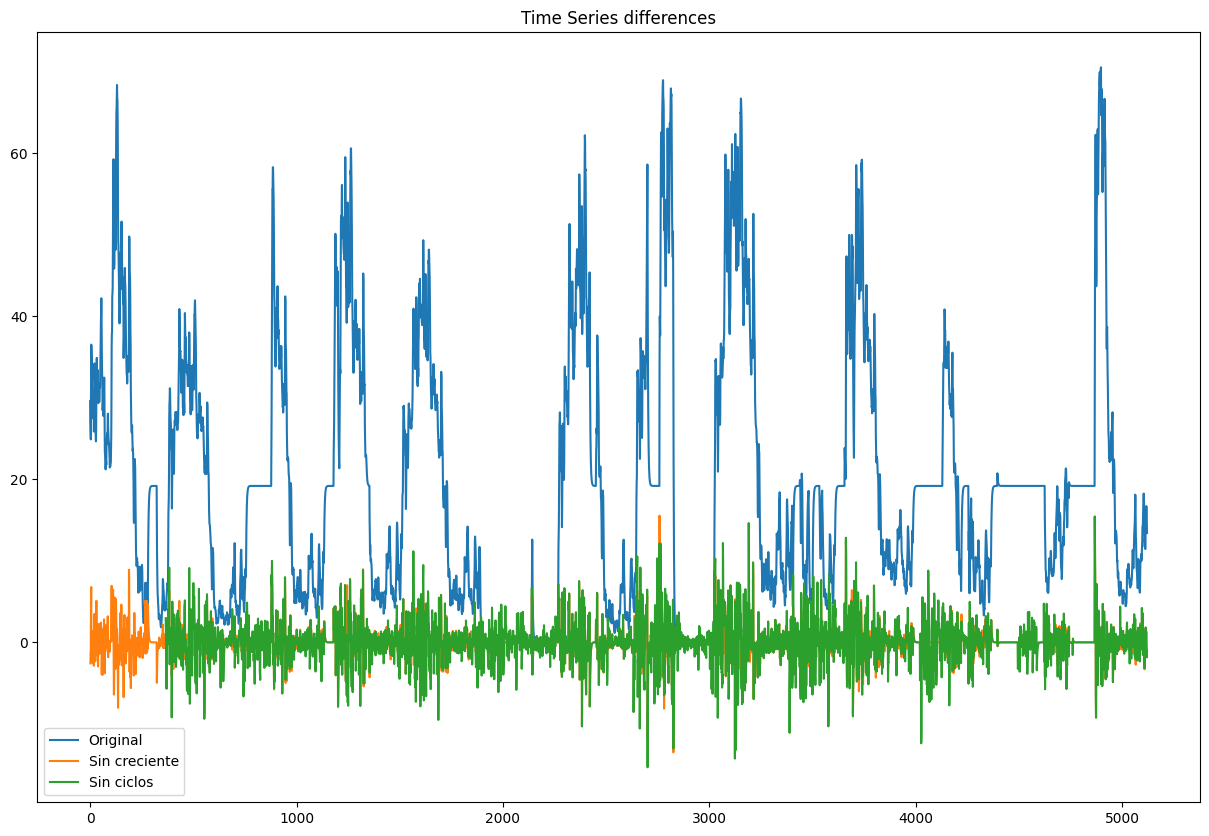

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(df['PM1_0'], label='Original')
plt.plot(dif1, label='Sin creciente')
plt.plot(dif2, label='Sin ciclos')
plt.legend()
plt.title('Time Series differences')


#### Respuesta: 

A lo largo del tiempo se observa que disminuye la mala calidad de aire. Si existe tendencia y es creciente

### ¿Hay alguna correlación entre la calidad del aire y las muertes relacionadas con la contaminación en cada ciudad? Podemos explorar la relación entre diferentes variables de contaminación del aire y las tasas de mortalidad en cada ciudad.

/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_50497/2059704910.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_corr.corr()


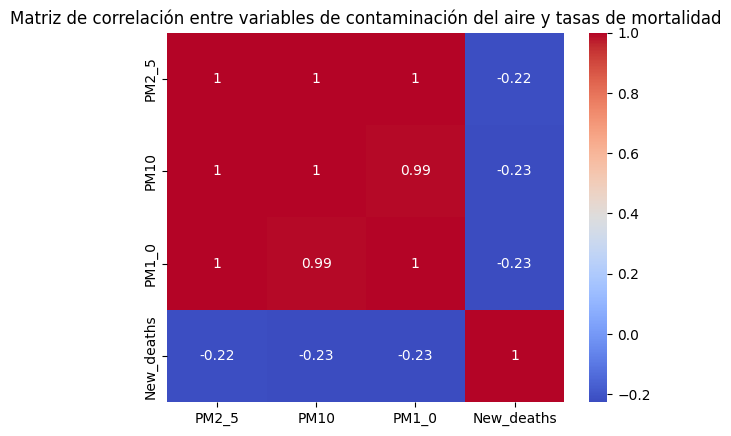

In [20]:
import seaborn as sns

# Seleccionar las variables que se utilizarán para el análisis
df_corr = df[['City', 'PM2_5', 'PM10' ,'PM1_0', 'New_deaths']]

# Calcular la matriz de correlación
corr = df_corr.corr()

# Crear un gráfico de mapa de calor de la matriz de correlación
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables de contaminación del aire y tasas de mortalidad')
plt.show()


En este código, hemos seleccionado las variables que se utilizarán para el análisis, que incluyen PM2_5, PM10, AQI y New_deaths (nuevas muertes relacionadas con la contaminación del aire). Luego hemos calculado la matriz de correlación y hemos creado un gráfico de mapa de calor de la matriz de correlación utilizando la biblioteca Seaborn.

Este gráfico nos permite visualizar la fuerza y dirección de la correlación entre cada par de variables. Un valor de 1 indica una correlación positiva perfecta (es decir, las variables se mueven juntas en la misma dirección), mientras que un valor de -1 indica una correlación negativa perfecta (es decir, las variables se mueven juntas en direcciones opuestas). Un valor cercano a 0 indica una correlación débil o nula.

Podemos interpretar el gráfico de mapa de calor para identificar cualquier correlación significativa entre las variables de contaminación del aire y las tasas de mortalidad en cada ciudad. Si hay una correlación significativa, podemos investigar más para comprender la naturaleza de la relación y cómo se puede mitigar el impacto en la salud pública.

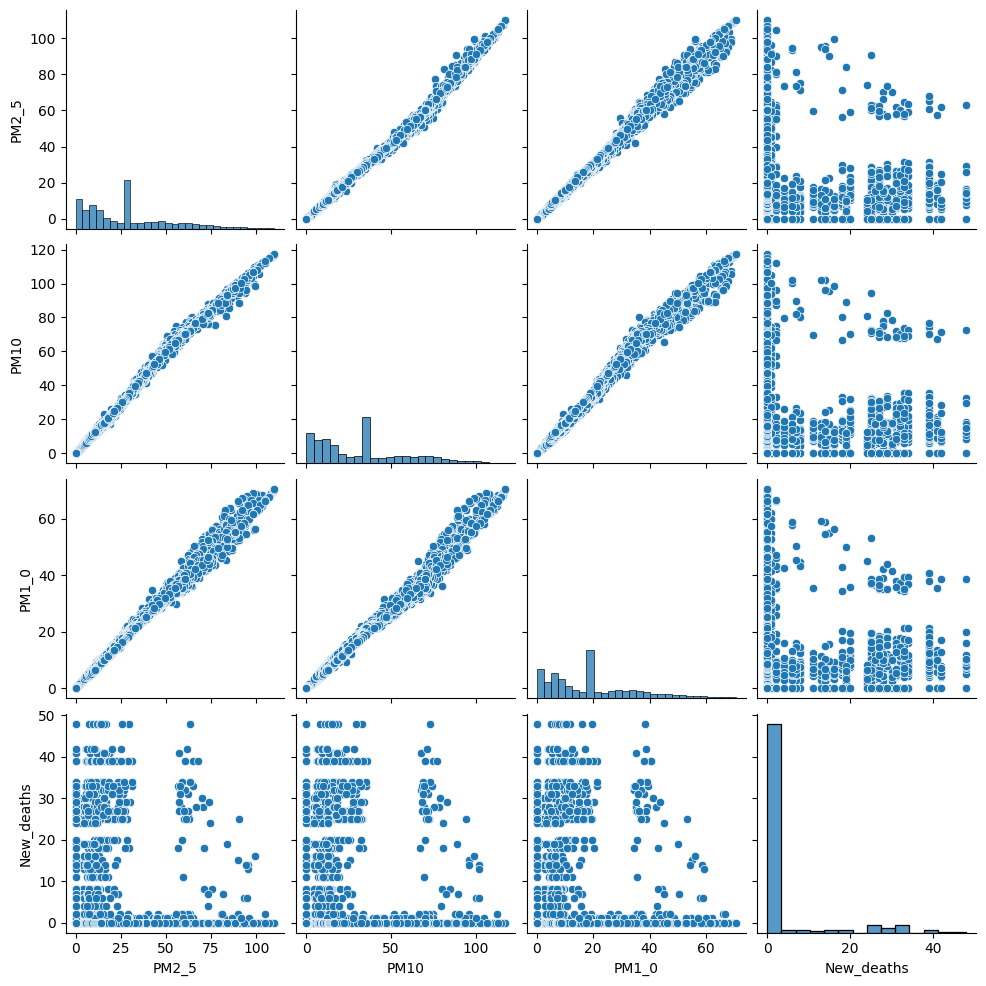

In [21]:
import seaborn as sns

# Seleccionar las variables que se utilizarán para el análisis
df_corr = df[['PM2_5', 'PM10', 'PM1_0', 'New_deaths']]

# Crear un correlograma
sns.pairplot(df_corr)
plt.show()


En este código, hemos seleccionado las variables que se utilizarán para el análisis, que incluyen PM2_5, PM10, AQI y New_deaths (nuevas muertes relacionadas con la contaminación del aire). Luego hemos utilizado la función pairplot de Seaborn para crear un correlograma que muestra las relaciones entre cada par de variables.

El correlograma incluirá histogramas de cada variable en la diagonal principal, y gráficos de dispersión para cada par de variables en las celdas restantes. Cada gráfico de dispersión incluirá una línea de regresión y un coeficiente de correlación para indicar la fuerza y dirección de la correlación entre las dos variables.

Podemos interpretar el correlograma para identificar cualquier correlación significativa entre las variables de contaminación del aire y las tasas de mortalidad. Si hay una correlación significativa, podemos investigar más para comprender la naturaleza de la relación y cómo se puede mitigar el impacto en la salud pública.

Graficamos el correlograma de la serie de tiempo New_deaths y el correlograma de New_deaths diferenciada (estacionaria). Utilice la función _plot_acf_ para graficar el correlograma.

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["New_deaths"], lags=50)
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

Un correlograma es una herramienta gráfica que se utiliza en el análisis de series de tiempo para visualizar la autocorrelación entre los valores de la serie a lo largo del tiempo. La autocorrelación se refiere a la relación entre los valores de una serie en diferentes momentos de tiempo. El correlograma representa la correlación entre los valores de la serie en diferentes desfases (lags) de tiempo.

El correlograma muestra una serie de gráficos de barras que representan la autocorrelación de la serie a diferentes lags o desfases. Cada barra en el gráfico representa el nivel de correlación entre la serie en el momento actual y el valor de la serie en un lag específico. Por lo general, el eje x del correlograma muestra los diferentes lags, mientras que el eje y muestra los niveles de correlación.

El correlograma puede ayudar a identificar patrones de autocorrelación en una serie de tiempo. Por ejemplo, si hay una fuerte correlación positiva en un lag específico, esto sugiere que el valor de la serie en ese lag está altamente correlacionado con el valor actual de la serie. Si hay una fuerte correlación negativa en un lag específico, esto sugiere que el valor de la serie en ese lag está altamente correlacionado con un valor opuesto en el valor actual de la serie.

El correlograma puede ser útil para identificar si una serie de tiempo tiene una tendencia o una estacionalidad, y para identificar si hay valores atípicos o fluctuaciones aleatorias en la serie. Además, el correlograma también se puede utilizar para seleccionar los parámetros óptimos para modelos de series de tiempo, como el modelo ARIMA.

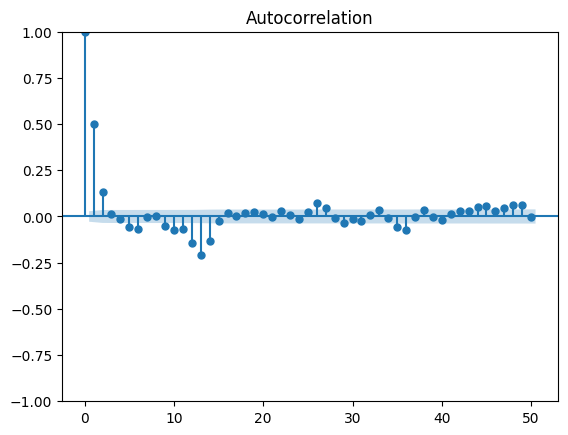

In [ ]:
plot_acf(dif2[366:], lags=50)
plt.show()

Un correlograma diferenciado (estacionario) es similar a un correlograma regular, pero se aplica a una serie de tiempo que ha sido diferenciada para hacerla estacionaria. La diferenciación es un proceso en el que se eliminan las tendencias y las estacionalidades de una serie de tiempo para hacerla estacionaria. Esto se hace tomando la diferencia entre los valores de la serie en diferentes momentos de tiempo.

Un correlograma diferenciado (estacionario) se utiliza para visualizar la autocorrelación en una serie de tiempo estacionaria después de aplicar la diferenciación. El correlograma diferenciado muestra la correlación entre los valores de la serie en diferentes lags después de aplicar la diferenciación.

El objetivo de la diferenciación y del correlograma diferenciado es identificar patrones en una serie de tiempo estacionaria que pueden ser utilizados para modelar la serie de manera más efectiva. En particular, el correlograma diferenciado puede ayudar a identificar el número de términos de autocorrelación y de medias móviles que se deben incluir en un modelo ARIMA para la serie de tiempo.

Un correlograma diferenciado puede ser útil para evaluar la adecuación de un modelo de series de tiempo para una serie de tiempo estacionaria. Si hay correlaciones significativas en los lags después de aplicar la diferenciación, puede ser una señal de que el modelo no se está ajustando adecuadamente a los patrones en los datos. Por lo tanto, un correlograma diferenciado puede ser útil para refinar y mejorar los modelos de series de tiempo para las series estacionarias.

#### Respuesta : 

Hay una correlación baja entre las nuevas muertes y la contaminación

In [ ]:
4.6 + (19/33 * 5) =  